In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Load datasets
data_files_basepath = f"{os.getcwd()}\\resources\\data"

plays = pd.read_csv(f"{data_files_basepath}\\plays.csv")
players = pd.read_csv(f"{data_files_basepath}\\players.csv")

# Combine all tracking weeks into a single DataFrame (first 2 weeks)
tracking_files = [f'tracking_week_{i}.csv' for i in range(1, 2)]
tracking_list = []
for file in tracking_files:
    try:
        df = pd.read_csv(f"{data_files_basepath}\\{file}", on_bad_lines='skip', engine='python')
        tracking_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")
tracking = pd.concat(tracking_list, ignore_index=True)


In [6]:
# Display first few rows
print("Plays dataset:")
print(plays.head(), "\n")

print("Players dataset:")
print(players.head(), "\n")

print("Tracking dataset:")
print(tracking.head(), "\n")

# Display summary information
print(plays.info(), "\n")
print(players.info(), "\n")
print(tracking.info(), "\n")

Plays dataset:
       gameId  playId                                    playDescription  \
0  2022102302    2655  (1:54) (Shotgun) J.Burrow pass short middle to...   
1  2022091809    3698  (2:13) (Shotgun) J.Burrow pass short right to ...   
2  2022103004    3146  (2:00) (Shotgun) D.Mills pass short right to D...   
3  2022110610     348  (9:28) (Shotgun) P.Mahomes pass short left to ...   
4  2022102700    2799  (2:16) (Shotgun) L.Jackson up the middle to TB...   

   quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
0        3     1         10            CIN           ATL          CIN   
1        4     1         10            CIN           DAL          CIN   
2        4     3         12            HOU           TEN          HOU   
3        1     2         10             KC           TEN          TEN   
4        3     2          8            BAL            TB           TB   

   yardlineNumber  ... yardsGained  homeTeamWinProbabilityAdded  \
0              21  ...

In [7]:
# Check for missing values
print("Missing values in Plays dataset:\n", plays.isnull().sum(), "\n")
print("Missing values in Players dataset:\n", players.isnull().sum(), "\n")
print("Missing values in Tracking dataset:\n", tracking.isnull().sum(), "\n")


Missing values in Plays dataset:
 gameId                                  0
playId                                  0
playDescription                         0
quarter                                 0
down                                    0
yardsToGo                               0
possessionTeam                          0
defensiveTeam                           0
yardlineSide                          224
yardlineNumber                          0
gameClock                               0
preSnapHomeScore                        0
preSnapVisitorScore                     0
playNullifiedByPenalty                  0
absoluteYardlineNumber                  0
preSnapHomeTeamWinProbability           0
preSnapVisitorTeamWinProbability        0
expectedPoints                          0
offenseFormation                      188
receiverAlignment                     188
playClockAtSnap                         1
passResult                           6388
passLength                           7398


In [8]:
# Descriptive statistics
print("Plays dataset statistics:\n", plays.describe(), "\n")
print("Players dataset statistics:\n", players.describe(), "\n")
print("Tracking dataset statistics:\n", tracking.describe(), "\n")

Plays dataset statistics:
              gameId        playId       quarter          down     yardsToGo  \
count  1.612400e+04  16124.000000  16124.000000  16124.000000  16124.000000   
mean   2.022099e+09   2023.830563      2.572253      1.800794      8.461300   
std    5.979252e+03   1182.090771      1.135404      0.827194      3.908658   
min    2.022091e+09     54.000000      1.000000      1.000000      1.000000   
25%    2.022093e+09    996.000000      2.000000      1.000000      6.000000   
50%    2.022101e+09   2017.000000      3.000000      2.000000     10.000000   
75%    2.022102e+09   3022.000000      4.000000      2.000000     10.000000   
max    2.022111e+09   5120.000000      5.000000      4.000000     38.000000   

       yardlineNumber  preSnapHomeScore  preSnapVisitorScore  \
count    16124.000000      16124.000000         16124.000000   
mean        29.226185         11.255830            10.049615   
std         12.662828          9.468489             9.224680   
min  

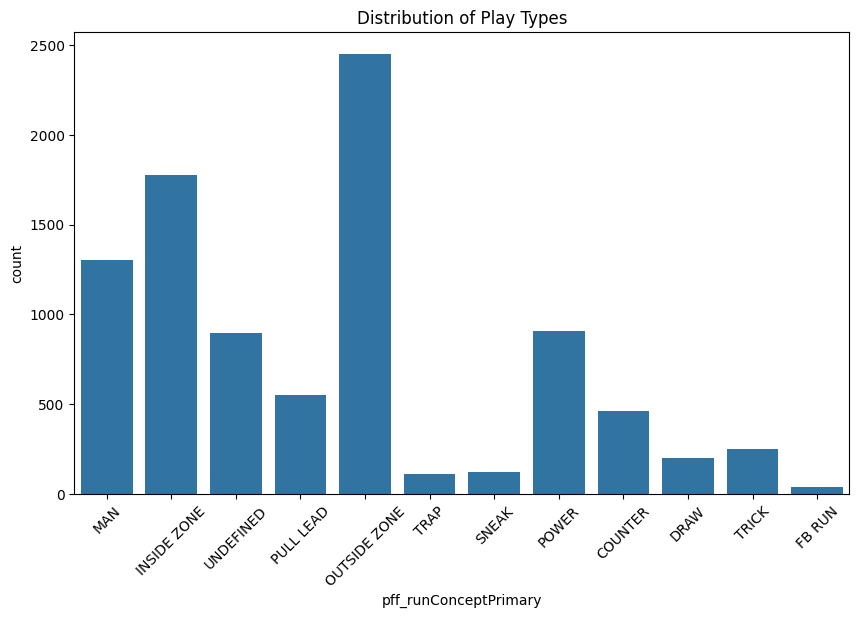

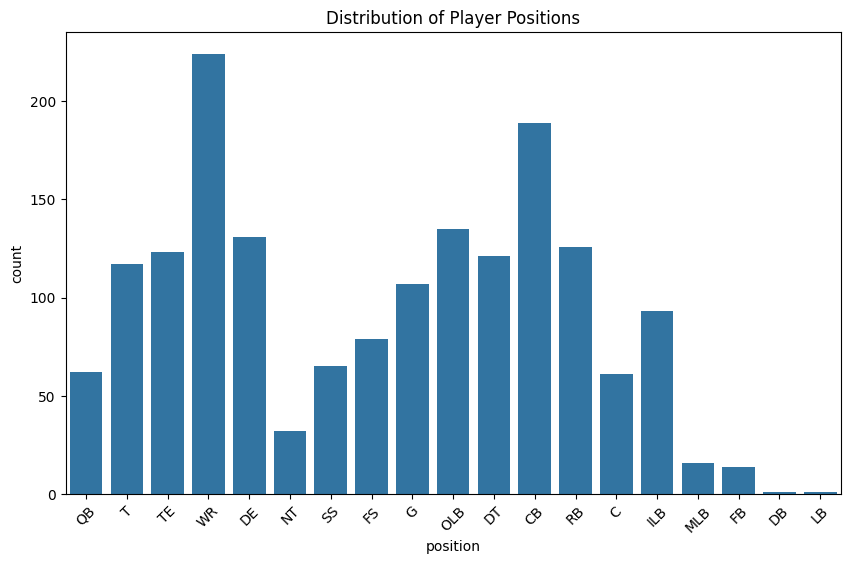

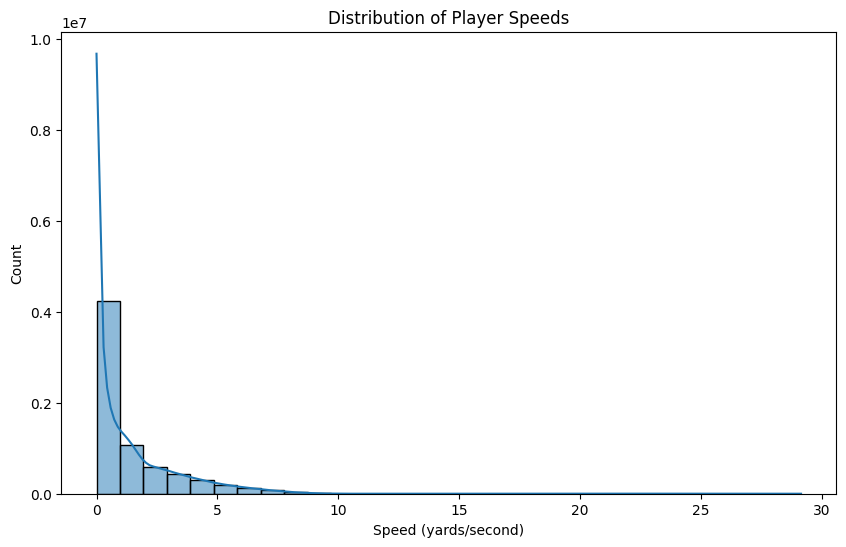

In [9]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data=plays, x='pff_runConceptPrimary')
plt.title('Distribution of Play Types')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=players, x='position')
plt.title('Distribution of Player Positions')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(tracking['s'], bins=30, kde=True)
plt.title('Distribution of Player Speeds')
plt.xlabel('Speed (yards/second)')
plt.show()